In [623]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jun  2 11:08:36 2022

@author: MolasG

Last modification 28/07/2022 - Sofia
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import glob, os
from os import listdir
from os.path import isfile, join

In [624]:
#path to the folder containing the .lo files
path = '/NVME/decrypted/scratch/multitrait/UK_BIOBANK_ZERO/gwas/2022_07_08_ventile2__FINAL'

In [625]:
#list of phenotypes/traits to include
traits______ = ["AVScore_all", "VD_small_artery", "medianCenter1_vein", "ratio_tau4_longest", "tau4_longestFifth_all", "AVScore_artery", "VD_small_vein",
 "medianCenter2_all", "slope", "tau4_longestFifth_artery", "AVScore_longestFifth_all", "arcLength_all", "medianCenter2_artery", "slope_artery", 
"tau4_longestFifth_vein", "AVScore_longestFifth_artery", "arcLength_artery", "medianCenter2_longestFifth_all", "slope_vein", "tau4_vein", 
"AVScore_longestFifth_vein", "arcLength_longestFifth_all", "medianCenter2_longestFifth_artery", "std_intensity", "tau5_all", "AVScore_vein", 
"arcLength_longestFifth_artery", "medianCenter2_longestFifth_vein", "tau1_all", "tau5_artery", "DF_all", "arcLength_longestFifth_vein", "medianCenter2_vein", 
"tau1_artery", "tau5_longestFifth_all", "DF_artery", "arcLength_vein", "medianDiameter_all", "tau1_longestFifth_all", "tau5_longestFifth_artery", 
"DF_longestFifth_all", "bifurcations", "medianDiameter_artery", "tau1_longestFifth_artery", "tau5_longestFifth_vein", "DF_longestFifth_artery", 
"chordLength_all", "medianDiameter_longestFifth_all", "tau1_longestFifth_vein", "tau5_vein", "DF_longestFifth_vein", "chordLength_artery",
"medianDiameter_longestFifth_artery", "tau1_vein", "tau6_all", "DF_vein", "chordLength_longestFifth_all", "medianDiameter_longestFifth_vein", 
"tau2_all", "tau6_artery", "D_A_std_std", "chordLength_longestFifth_artery", "medianDiameter_vein", "tau2_artery", "tau6_longestFifth_all", "D_V_std_std", 
"chordLength_longestFifth_vein", "median_CRAE", "tau2_longestFifth_all", "tau6_longestFifth_artery", "D_median_CVMe", "chordLength_vein", "median_CRVE", 
"tau2_longestFifth_artery", "tau6_longestFifth_vein", "D_std_median", "eq_CRAE", "nVessels", "tau2_longestFifth_vein", "tau6_vein", "D_std_std", "eq_CRVE", 
"pixels_fraction", "tau2_vein", "tau7_all", "N_median_main_arteries", "mean_angle_taa", "ratio_AV_DF", "tau3_all", "tau7_artery", "N_median_main_veins", 
"mean_angle_tva", "ratio_AV_medianDiameter", "tau3_artery", "tau7_longestFifth_all", "N_std_main_arteries", "mean_intensity", "ratio_CRAE_CRVE", 
"tau3_longestFifth_all", "tau7_longestFifth_artery", "N_std_main_veins", "medianCenter1_all", "ratio_DF_longest", "tau3_longestFifth_artery", 
"tau7_longestFifth_vein", "VD_orig_all", "medianCenter1_artery", "ratio_medianDiameter_longest", "tau3_longestFifth_vein", "tau7_vein", "VD_orig_artery", 
"medianCenter1_longestFifth_all", "ratio_median_CRAE_CRVE", " tau3_vein", "VD_orig_vein", "medianCenter1_longestFifth_artery", "ratio_tau2_longest", "tau4_all", 
"VD_small_all", "medianCenter1_longestFifth_vein", "ratio_tau3_longest", "tau4_artery"]


typical_errors=['medianCenter2_all','AVScore_artery', 'medianCenter2_artery', 'AVScore_longestFifth_artery', 'medianCenter2_longestFifth_all', 'medianCenter2_longestFifth_artery',
        'medianCenter2_longestFifth_vein', 'medianCenter2_vein']

traits = ['AVScore_all',
 'AVScore_longestFifth_all',
 'tau1_longestFifth_all',
 'tau1_longestFifth_artery',
 'tau1_longestFifth_vein',
 'tau1_all',
 'tau1_artery',
 'tau1_vein',
 'tau2_longestFifth_all',
 'tau2_longestFifth_artery',
 'tau2_longestFifth_vein',
 'tau2_all',
 'tau2_artery',
 'tau2_vein',
 'tau4_longestFifth_all',
 'tau4_longestFifth_artery',
 'tau4_longestFifth_vein',
 'tau4_all',
 'tau4_artery',
 'tau4_vein',
 'D_A_std_std',
 'D_V_std_std',
 'D_median_CVMe',
 'N_median_main_arteries',
 'N_median_main_veins',
 'arcLength_longestFifth_artery',
 'arcLength_longestFifth_vein',
 'arcLength_artery',
 'arcLength_vein',
 'bifurcations',
 'VD_orig_all',
 'VD_orig_artery',
 'VD_orig_vein',
 'slope',
 'slope_artery',
 'slope_vein',
 'mean_angle_taa',
 'mean_angle_tva',
 'medianCenter1_longestFifth_artery',       # median median vessel position on X axis
 'medianCenter1_longestFifth_vein',
 #'medianCenter1_artery', # falla si la dejo, error
 'medianCenter1_vein',
 'medianDiameter_longestFifth_artery',
 'medianDiameter_longestFifth_vein',
 'eq_CRAE',
 'eq_CRVE',
 'median_CRAE',
 'median_CRVE',
 'ratio_CRAE_CRVE',
 'ratio_median_CRAE_CRVE',
 'ratio_AV_medianDiameter',                 # most likely remove, kept for completion for the time being
 'ratio_medianDiameter_longest',
 'ratio_DF_longest',
 'ratio_tau2_longest',
 'ratio_tau4_longest']



In [626]:
# lsit the files contained in the folder
os.chdir(path)
files = [f for f in glob.glob("*munged.sumstats.gz.log") if isfile(join(path, f))] 
#files = [f for f in listdir(path) if isfile(join(path, f))] 
# maps to store results
array1 = np.zeros((len(traits),len(traits)))
array2 = np.zeros((len(traits),len(traits)))

heritability = [ [ ] for i in range(len(traits))] #np.zeros( len(traits) )

print('len traits: ', len(traits))
print('len files: ', len(files))


len traits:  54
len files:  14762


In [627]:
# filter the files names containing 2 traits

for f in files:
    count = 0
    idx =  []
    for t in traits:
        if(t in f):
            count+=1
            idx.append(traits.index(t))
            
            if(count==2):
                h2 = []
                with open(path+'/'+f) as fp:
                    Lines = fp.readlines()
                    for line in Lines:
                        split = line.split()
                        if('h2:' in split):
                            h2.append( float(split[ split.index('h2:') +1 ]) )
                            #print(h2)
                        if('gencov:' in split):
                            array1[idx[0],idx[1]] = float(split[ split.index('gencov:') +1 ])
                            array1[idx[1],idx[0]] = float(split[ split.index('gencov:') +1 ])
                            #print(array1)
                        if('Correlation:' in split):
                            array2[idx[0],idx[1]] = float(split[ split.index('Correlation:') +1 ]) 
                            array2[idx[1],idx[0]] = float(split[ split.index('Correlation:') +1 ]) 
                            #print(array2)


                for i in range(len(h2)):
                    heritability[idx[i]].append(h2[i])

            elif( (count==1) and (len( f.split(traits[idx[0]]) ) == 3)):
                with open(path+'/'+f) as fp:
                    Lines = fp.readlines()
                    for line in Lines:
                        split = line.split()
                        if('h2:' in split):
                            array2[idx[0],idx[0]] = float(split[ split.index('h2:') +1 ]) 

In [628]:
df2 = pd.DataFrame(array2,columns=traits,index=traits)
df2.head(5)

,AVScore_all,AVScore_longestFifth_all,tau1_longestFifth_all,tau1_longestFifth_artery,tau1_longestFifth_vein,tau1_all,tau1_artery,tau1_vein,tau2_longestFifth_all,tau2_longestFifth_artery,...,eq_CRVE,median_CRAE,median_CRVE,ratio_CRAE_CRVE,ratio_median_CRAE_CRVE,ratio_AV_medianDiameter,ratio_medianDiameter_longest,ratio_DF_longest,ratio_tau2_longest,ratio_tau4_longest
AVScore_all,0.0000,0.7876,-0.0344,0.0045,-0.1704,0.0079,0.0464,-0.0460,-0.1132,-0.0805,...,0.0224,0.2787,0.0118,0.2777,0.0,0.1071,0.0072,0.1050,0.0884,0.1215
AVScore_longestFifth_all,0.7876,0.0373,0.0863,0.0721,-0.0743,0.1730,0.2110,0.0367,-0.1143,-0.0829,...,0.0764,0.2805,0.0876,0.1339,0.0,0.2356,0.0305,0.1144,0.1138,0.0493
tau1_longestFifth_all,-0.0344,0.0863,0.2441,0.9353,0.7279,0.9551,0.9223,0.7918,0.8484,0.8370,...,0.0528,0.1272,0.1508,-0.0046,0.0,0.2581,0.3745,0.7071,0.3056,0.2952
tau1_longestFifth_artery,0.0045,0.0721,0.9353,0.2774,0.4416,0.8574,0.9801,0.4868,0.7907,0.9470,...,0.0441,0.1187,0.1104,0.0025,0.0,0.1414,0.2427,0.9083,0.5987,0.5979
tau1_longestFifth_vein,-0.1704,-0.0743,0.7279,0.4416,0.1244,0.7648,0.4411,1.0231,0.6460,0.3429,...,0.0551,0.0289,0.1825,-0.0249,0.0,0.3810,0.4186,0.0163,-0.3998,-0.3941


Text(0.5, 1.0, 'Total Observed Scale Gencov')

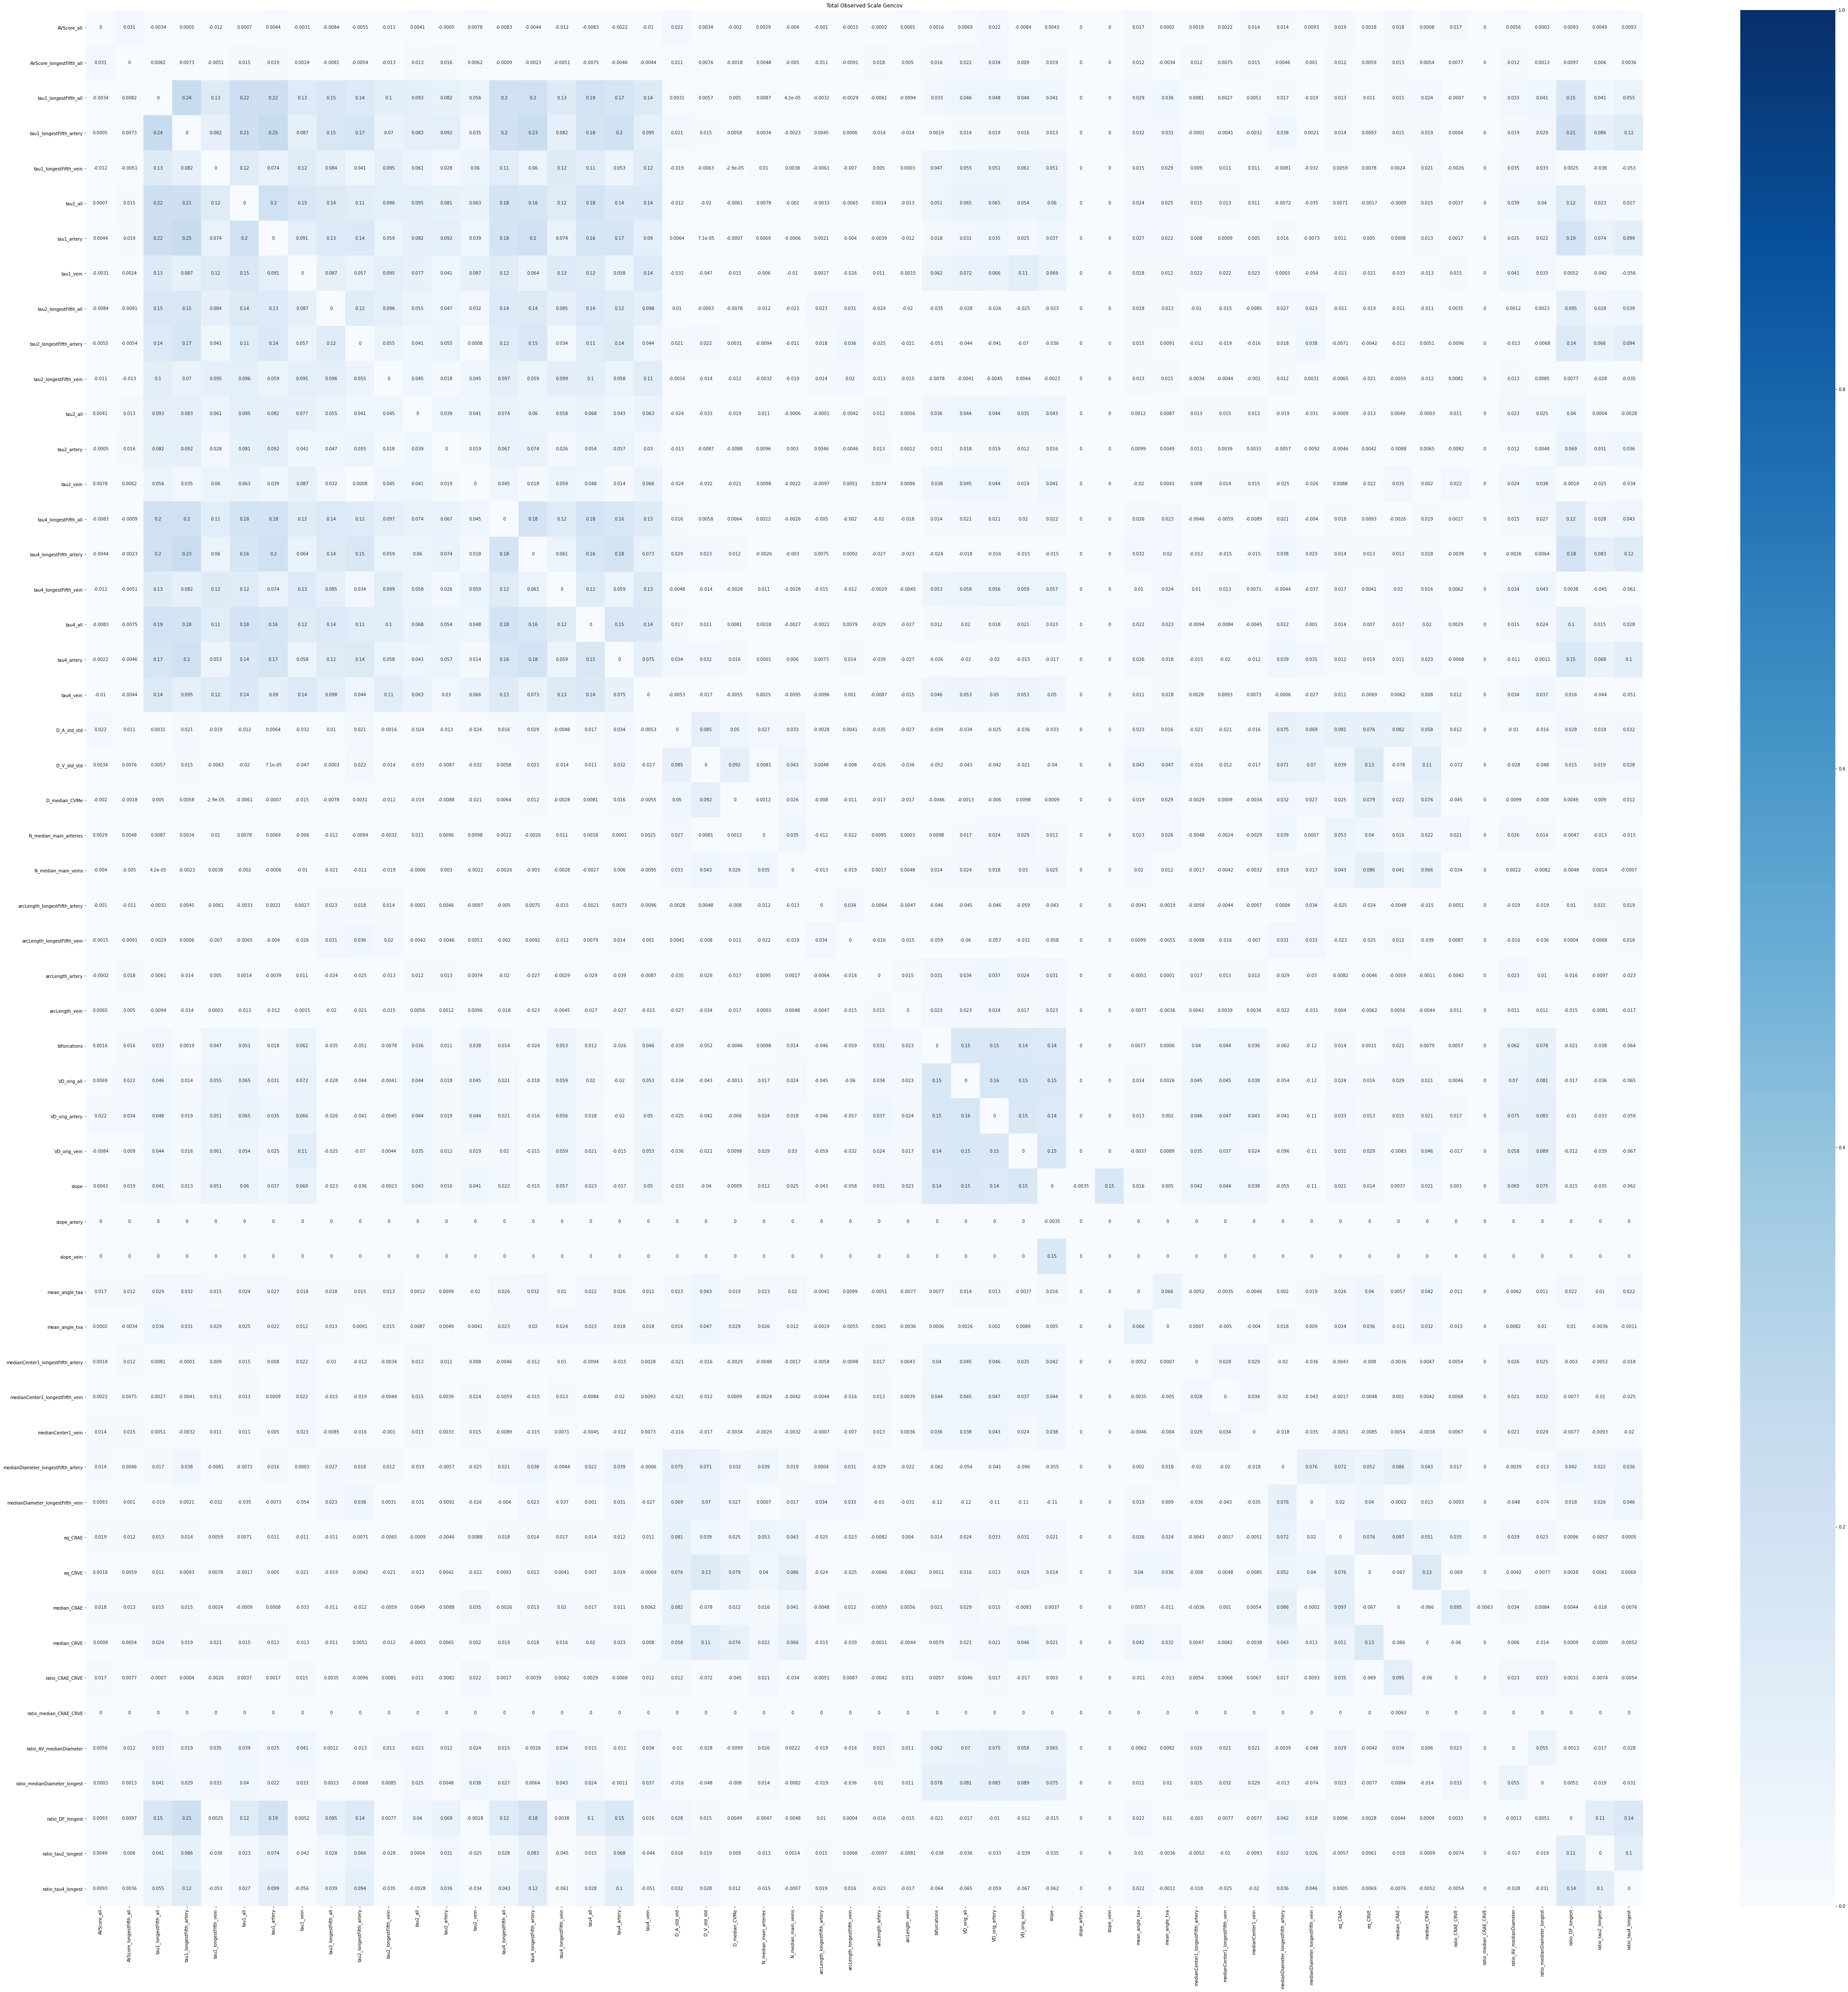

In [629]:
##### gen cov:

plt.figure(figsize=(80,80))
df1 = pd.DataFrame(array1,columns=traits,index=traits)
#plt.figure(figsize=(12,10))
sb.heatmap(df1,vmin=0, vmax=1,cmap="Blues",annot=True)
plt.title( 'Total Observed Scale Gencov' )

Text(0.5, 1.0, 'Genetic Correlation')

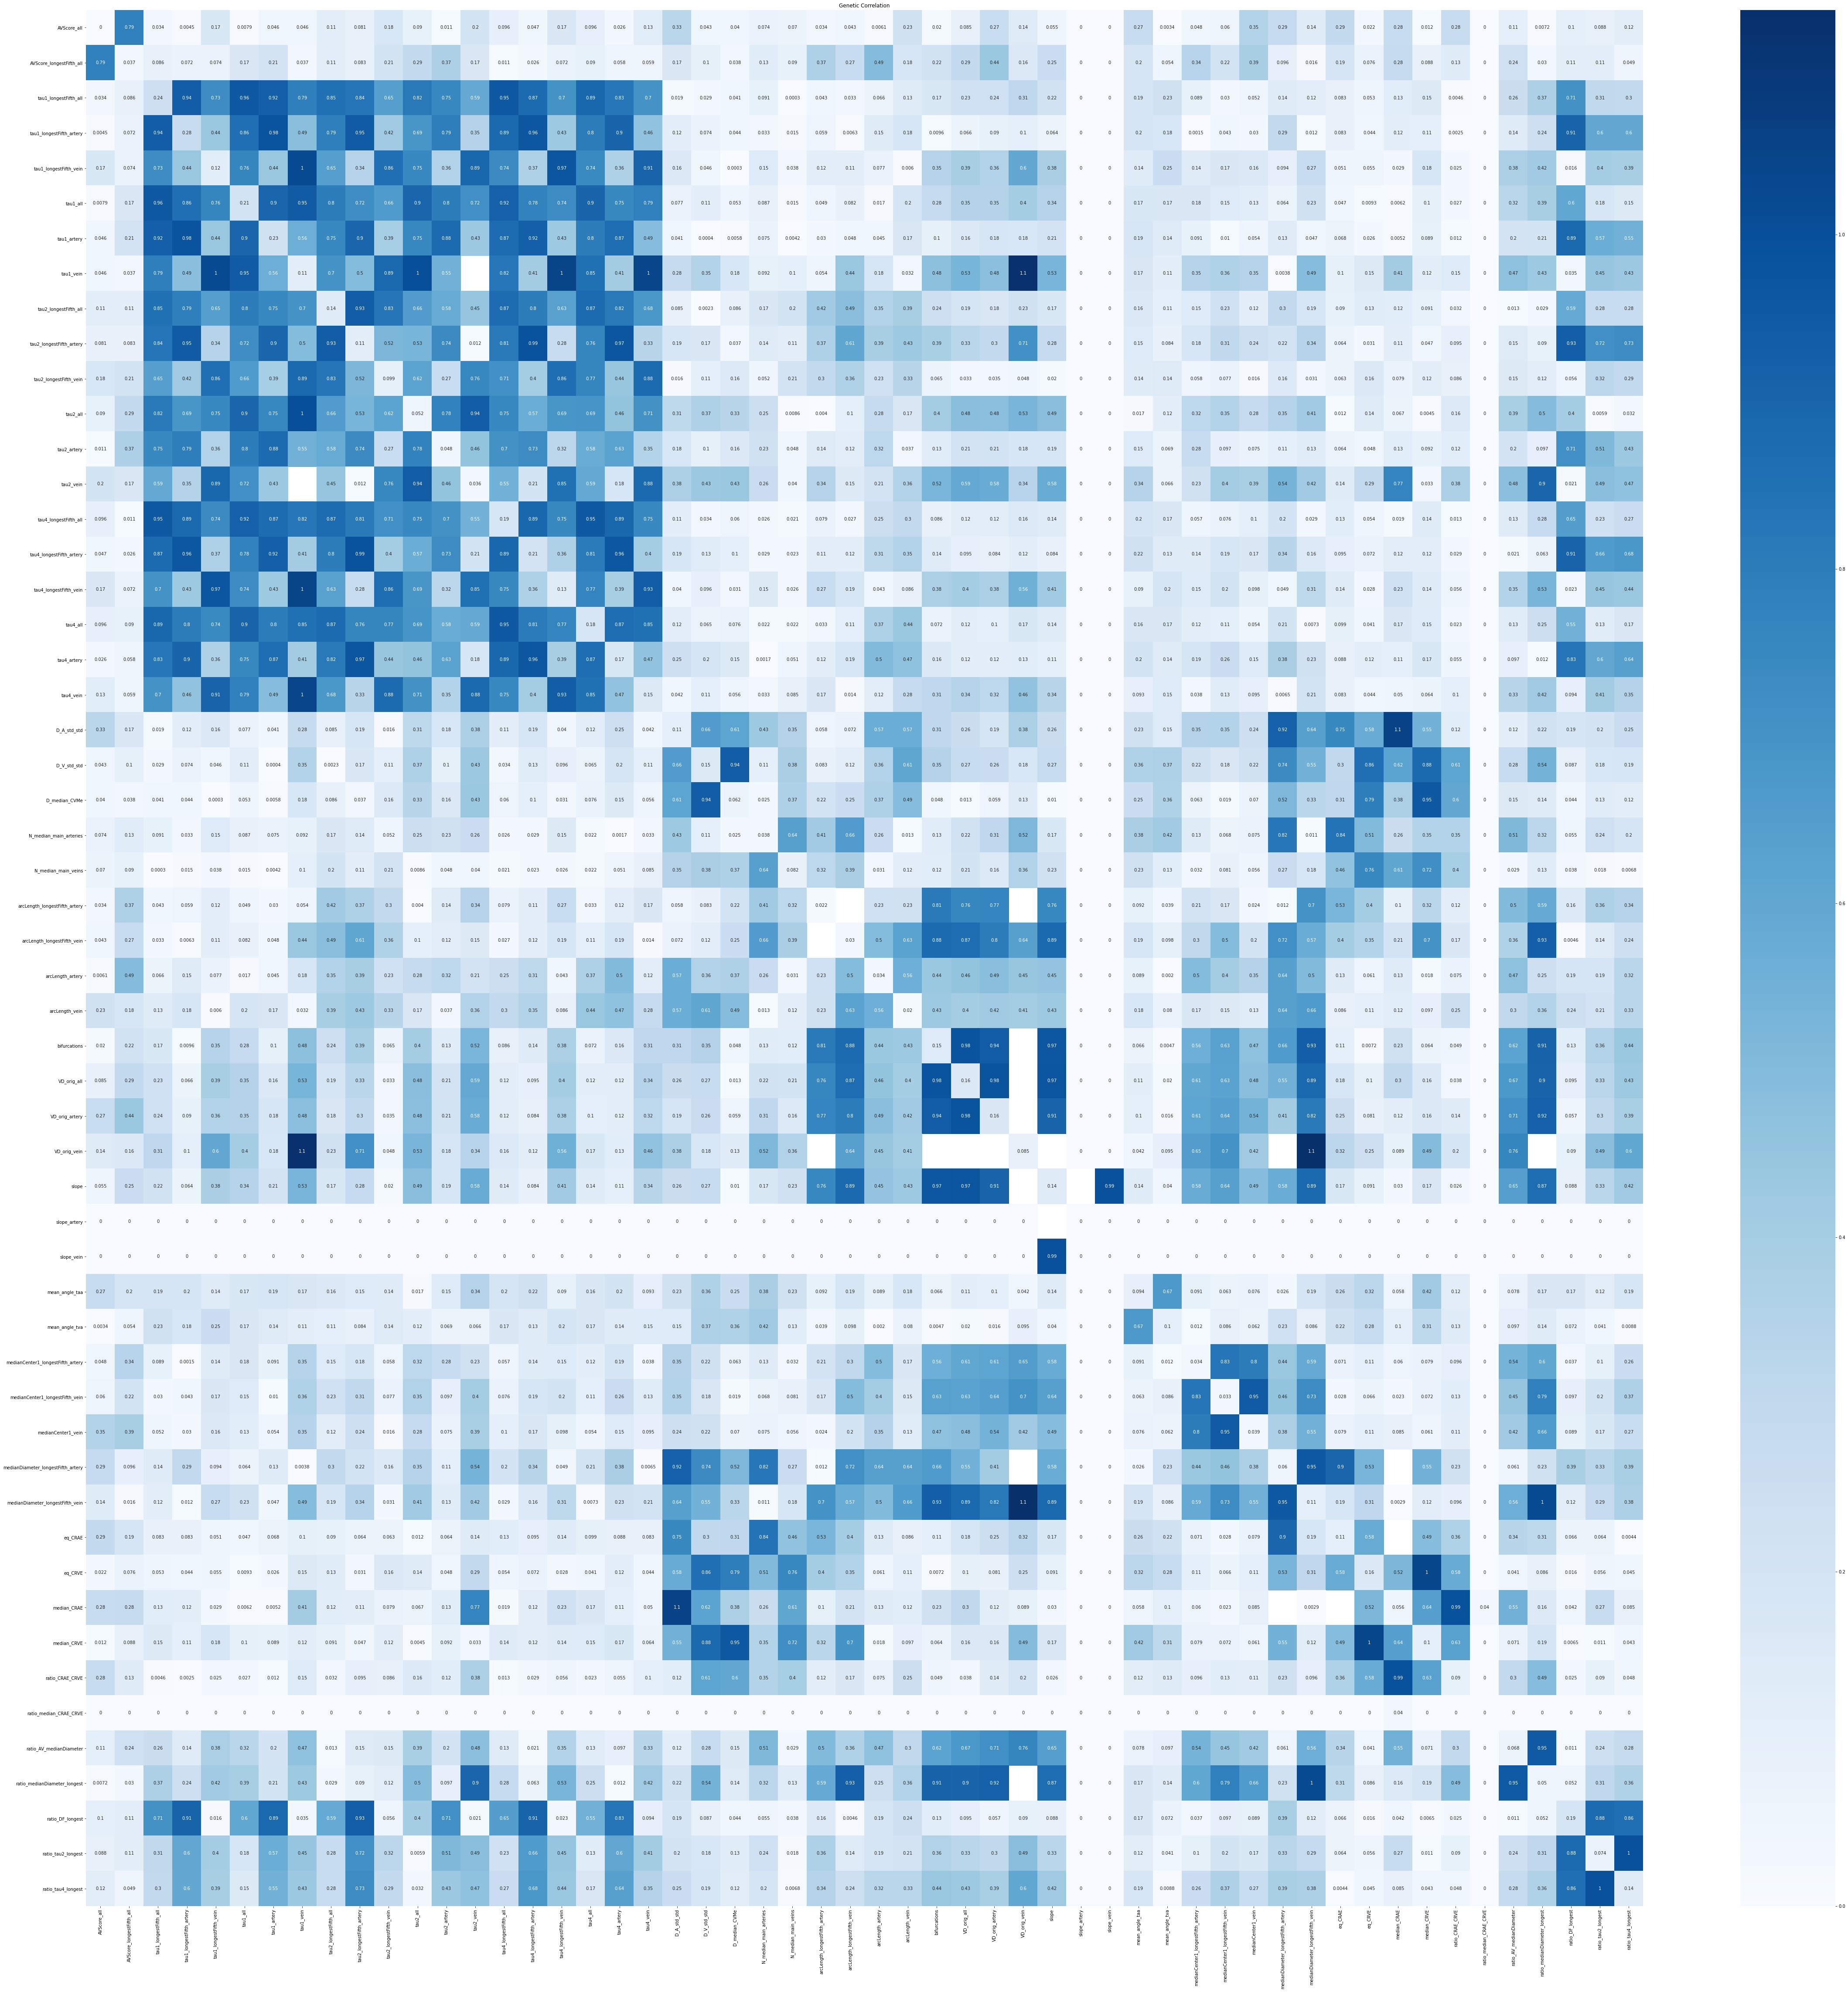

In [630]:
#### gen corr


plt.figure(figsize=(80,80))
sb.heatmap(abs(df2),cmap="Blues",annot=True)
#sb.heatmap(df2,vmin=0, vmax=1,cmap="Blues",annot=True)
plt.title('Genetic Correlation')
#plt.savefig('/SSD/home/sofia/retina-phenotypes/complementary/GWAS_postprocessing/ldsr_correlation/imagen.jpg')



# pairwise distance metric: an easy proxy for "correlation distance": 1 - abs(corr)
# clustering method: average

Count nans:  24 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()


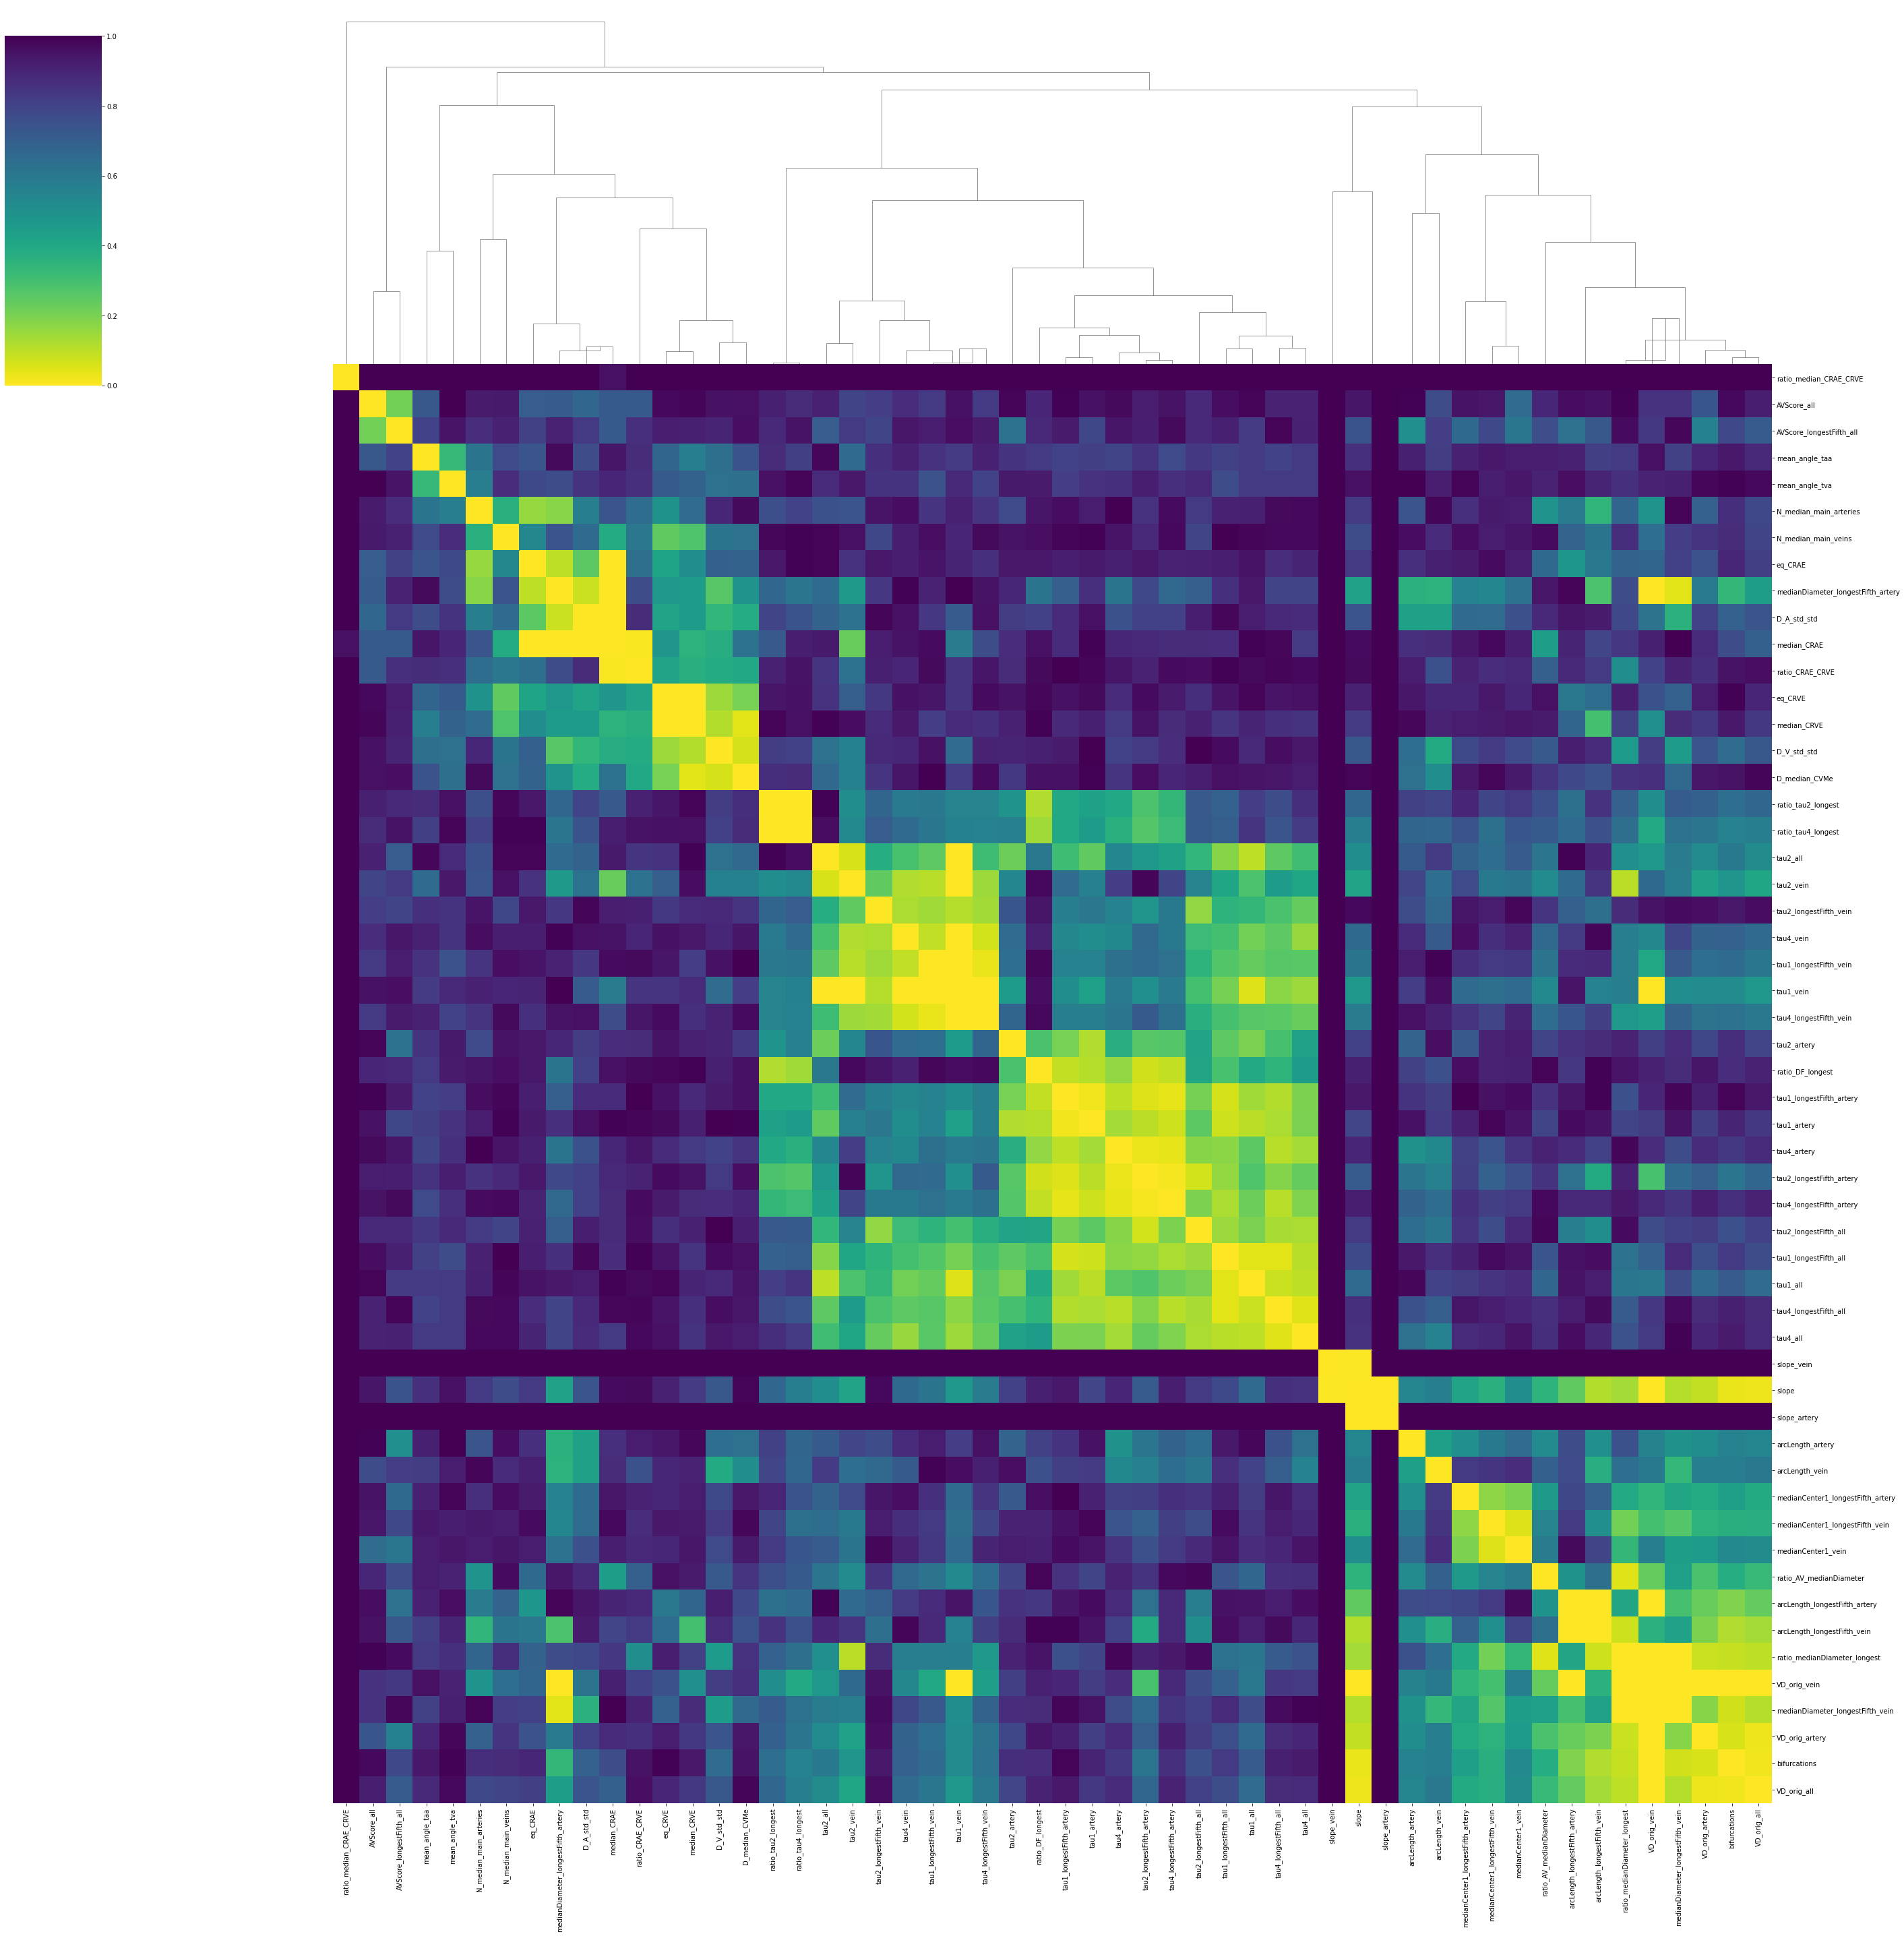

In [632]:
import seaborn as sns
from matplotlib import cm
from matplotlib import pyplot as plt
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
### You need to: 
## - delete the nans, 
## - diagonal to 0, and
## - abs(linkage)

df_2_nan = df2
df_2_nan=df_2_nan.replace(np.nan,1)
print('Count nans: ', df2.isna().sum().sum(), df_2_nan.isna().sum().sum())
# pairwise distance: define distance between two perfectly negatively correlated traits as 0
df_otro = 1 - abs(df_2_nan) 
## diagonal same value:
df_otro.values[[np.arange(df_otro.shape[0])]*2] = 0

linkage = hc.linkage(sp.distance.squareform(df_otro), method='average')
lik_abs= abs(linkage)
h = sns.clustermap(df_otro, row_linkage=lik_abs, col_linkage=lik_abs, cmap=cm.get_cmap('viridis_r'), figsize=(40,40), vmin=0, vmax=1)
h.ax_row_dendrogram.set_visible(False)
#h.ax_heatmap.xaxis.tick_top()
h.ax_heatmap.tick_params(axis='x', rotation=90)
#plt.savefig('/SSD/home/sofia/retina-phenotypes/complementary/GWAS_postprocessing/ldsr_correlation/27_07_2022_gcorrimagen.jpg')